In [13]:
import GCRCatalogs
import clevar

In [1]:
import numpy as np
from astropy.table import Table
input1 = Table({
    'ID': [f'CL{i}' for i in range(5)],
    'RA': [0.0, 0.0001, 0.00011, 25, 20],
    'DEC': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Z': [0.2, 0.3, 0.25, 0.4, 0.35],
    'MASS': [10**13.5, 10**13.4, 10**13.3, 10**13.8, 10**14],
    'RADIUS_ARCMIN': [1.0, 1.0, 1.0, 1.0, 1.0],
})
input2 = Table({
    'ID': ['CL0', 'CL1', 'CL2', 'CL3'],
    'RA': [0.0, 0.0001, 0.00011, 25],
    'DEC': [0.0, 0, 0, 0],
    'Z': [0.3, 0.2, 0.25, 0.4],
    'MASS': [10**13.3, 10**13.4, 10**13.5, 10**13.8],
    'RADIUS_ARCMIN': [1.0, 1.0, 1.0, 1.0],
})
display(input1)
display(input2)

ID,RA,DEC,Z,MASS,RADIUS_ARCMIN
str3,float64,float64,float64,float64,float64
CL0,0.0,0.0,0.2,31622776601683.793,1.0
CL1,0.0001,0.0,0.3,25118864315095.82,1.0
CL2,0.00011,0.0,0.25,19952623149688.83,1.0
CL3,25.0,0.0,0.4,63095734448019.43,1.0
CL4,20.0,0.0,0.35,100000000000000.0,1.0


ID,RA,DEC,Z,MASS,RADIUS_ARCMIN
str3,float64,float64,float64,float64,float64
CL0,0.0,0.0,0.3,19952623149688.83,1.0
CL1,0.0001,0.0,0.2,25118864315095.82,1.0
CL2,0.00011,0.0,0.25,31622776601683.793,1.0
CL3,25.0,0.0,0.4,63095734448019.43,1.0


In [20]:
from clevar.catalog import ClCatalog
def gen_clcat(cat1, cat2):
    c1 = ClCatalog(cat1, id=input1['ID'], ra=input1['RA'], dec=input1['DEC'], z=input1['Z'], mass=input1['MASS'])
    c2 = ClCatalog(cat2, id=input2['ID'], ra=input2['RA'], dec=input2['DEC'], z=input2['Z'], mass=input2['MASS'])
    # Format for nice display
    for c in ('ra', 'dec', 'z'):
        c1[c].info.format = '.2f'
        c2[c].info.format = '.2f'
    for c in ('mass',):
        c1[c].info.format = '.2e'
        c2[c].info.format = '.2e'
    return c1,c2
c1, c2 = gen_clcat('Cat1', 'Cat2')
display(c1)
display(c2)

id,ra,dec,z,mass,mt_self,mt_other,mt_multi_self,mt_multi_other
str3,float64,float64,float64,float64,object,object,object,object
CL0,0.00,0.00,0.20,3.16e+13,None,None,[],[]
CL1,0.00,0.00,0.30,2.51e+13,None,None,[],[]
CL2,0.00,0.00,0.25,2.00e+13,None,None,[],[]
CL3,25.00,0.00,0.40,6.31e+13,None,None,[],[]
CL4,20.00,0.00,0.35,1.00e+14,None,None,[],[]


id,ra,dec,z,mass,mt_self,mt_other,mt_multi_self,mt_multi_other
str3,float64,float64,float64,float64,object,object,object,object
CL0,0.00,0.00,0.30,2.00e+13,None,None,[],[]
CL1,0.00,0.00,0.20,2.51e+13,None,None,[],[]
CL2,0.00,0.00,0.25,3.16e+13,None,None,[],[]
CL3,25.00,0.00,0.40,6.31e+13,None,None,[],[]


In [21]:
from clevar.match import ProximityMatch
mt = ProximityMatch()

In [22]:
match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'angular_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':.2, #Set z 'uncertainty'
                'match_radius': '1 mpc'
                },
    'catalog2': {'delta_z':.2,
                'match_radius': '1 arcsec'
                }}
from clevar.cosmology import AstroPyCosmology
cosmo = AstroPyCosmology()
mt.match_from_config(c1, c2, match_config, cosmo=cosmo) #its a match from various criterias


## ClCatalog 1
## Prep mt_cols
* zmin|zmax from config value
* ang radius from set scale

## ClCatalog 2
## Prep mt_cols
* zmin|zmax from config value
* ang radius from set scale

## Multiple match (catalog 1)
Finding candidates (Cat1)
* 4/5 objects matched.

## Multiple match (catalog 2)
Finding candidates (Cat2)
* 4/4 objects matched.

## Finding unique matches of catalog 1
Unique Matches (Cat1)
* 4/5 objects matched.

## Finding unique matches of catalog 2
Unique Matches (Cat2)
* 4/4 objects matched.
Cross Matches (Cat1)
* 4/5 objects matched.
Cross Matches (Cat2)
* 4/4 objects matched.


In [23]:
display(c1, c2)

In [32]:
ca, cb = gen_clcat('Cata','Catb')
match_configab = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'more_massive', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':.2, #Set z 'uncertainty'
                'match_radius': '1 mpc'
                },
    'catalog2': {'delta_z':.2,
                'match_radius': '1 mpc'
                }
}
mt.match_from_config(ca, cb, match_configab, cosmo=cosmo) #its a match from various criterias


## ClCatalog 1
## Prep mt_cols
* zmin|zmax from config value
* ang radius from set scale

## ClCatalog 2
## Prep mt_cols
* zmin|zmax from config value
* ang radius from set scale

## Multiple match (catalog 1)
Finding candidates (Cata)
* 4/5 objects matched.

## Multiple match (catalog 2)
Finding candidates (Catb)
* 4/4 objects matched.

## Finding unique matches of catalog 1
Unique Matches (Cata)
* 4/5 objects matched.

## Finding unique matches of catalog 2
Unique Matches (Catb)
* 4/4 objects matched.
Cross Matches (Cata)
* 4/5 objects matched.
Cross Matches (Catb)
* 4/4 objects matched.


In [33]:
display(ca, cb)

In [ ]:
cc, cd = gen_clcat('Catc','Catd')
#can also use 
mt.multiple(cc, cd)
mt.multiple(cd, cc)

In [35]:
display(c1)
display(c2)

In [29]:
#case of unique param matching
mt.unique(c1, c2, preference='more_massive')
mt.unique(c2, c1, preference='more_massive')

Unique Matches (Cat1)
* 4/5 objects matched.
Unique Matches (Cat2)
* 4/4 objects matched.


In [30]:
display(c1)
display(c2)

In [31]:
c1.cross_match()
c2.cross_match()

In [32]:
display(c1)
display(c2)

In [11]:
from clevar.match import get_matched_pairs
mt1, mt2 = get_matched_pairs(c1, c2, 'cross')

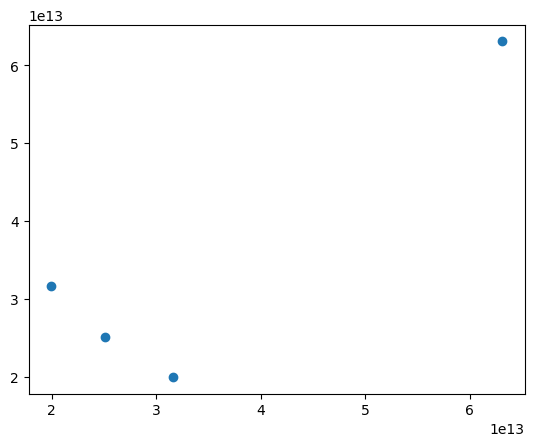

In [12]:
import pylab as plt
plt.scatter(mt1['mass'], mt2['mass'])